<a href="https://colab.research.google.com/github/dscoool/opencv/blob/main/opencv_rotate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# OpenCV
#회전 (Rotate)


회전(Rotate)은 선형 변환 중 하나에 포함되며, 회전 변환 행렬(Rotation matrix)을 통해 변환이 진행됩니다.



회전 변환 행렬은 임의의 점을 중심으로 물체를 회전시킵니다. 회전 변환 행렬의 일부는 반사 행렬(Reflection matrix)과 같은 값을 지닐 수 있습니다.

2차원 유클리드 공간에서의 회전은 크게 두 가지 회전 행렬을 갖습니다. 좌푯값을 회전시키는 회전 행렬과 좌표 축을 회전시키는 회전 행렬이 있습니다.

좌표 회전 행렬은 원점을 중심으로 좌푯값을 회전시켜 매핑하며, 좌표 축 회전 행렬은 원점을 중심으로 행렬 자체를 회전시켜 새로운 행렬의 값을 구성합니다.

OpenCV의 회전 함수는 좌표 축의 회전 이동 행렬과 동일한 형태이며, 비율을 조정하거나 중심점의 기준을 변경하여 회전할 수 있습니다.

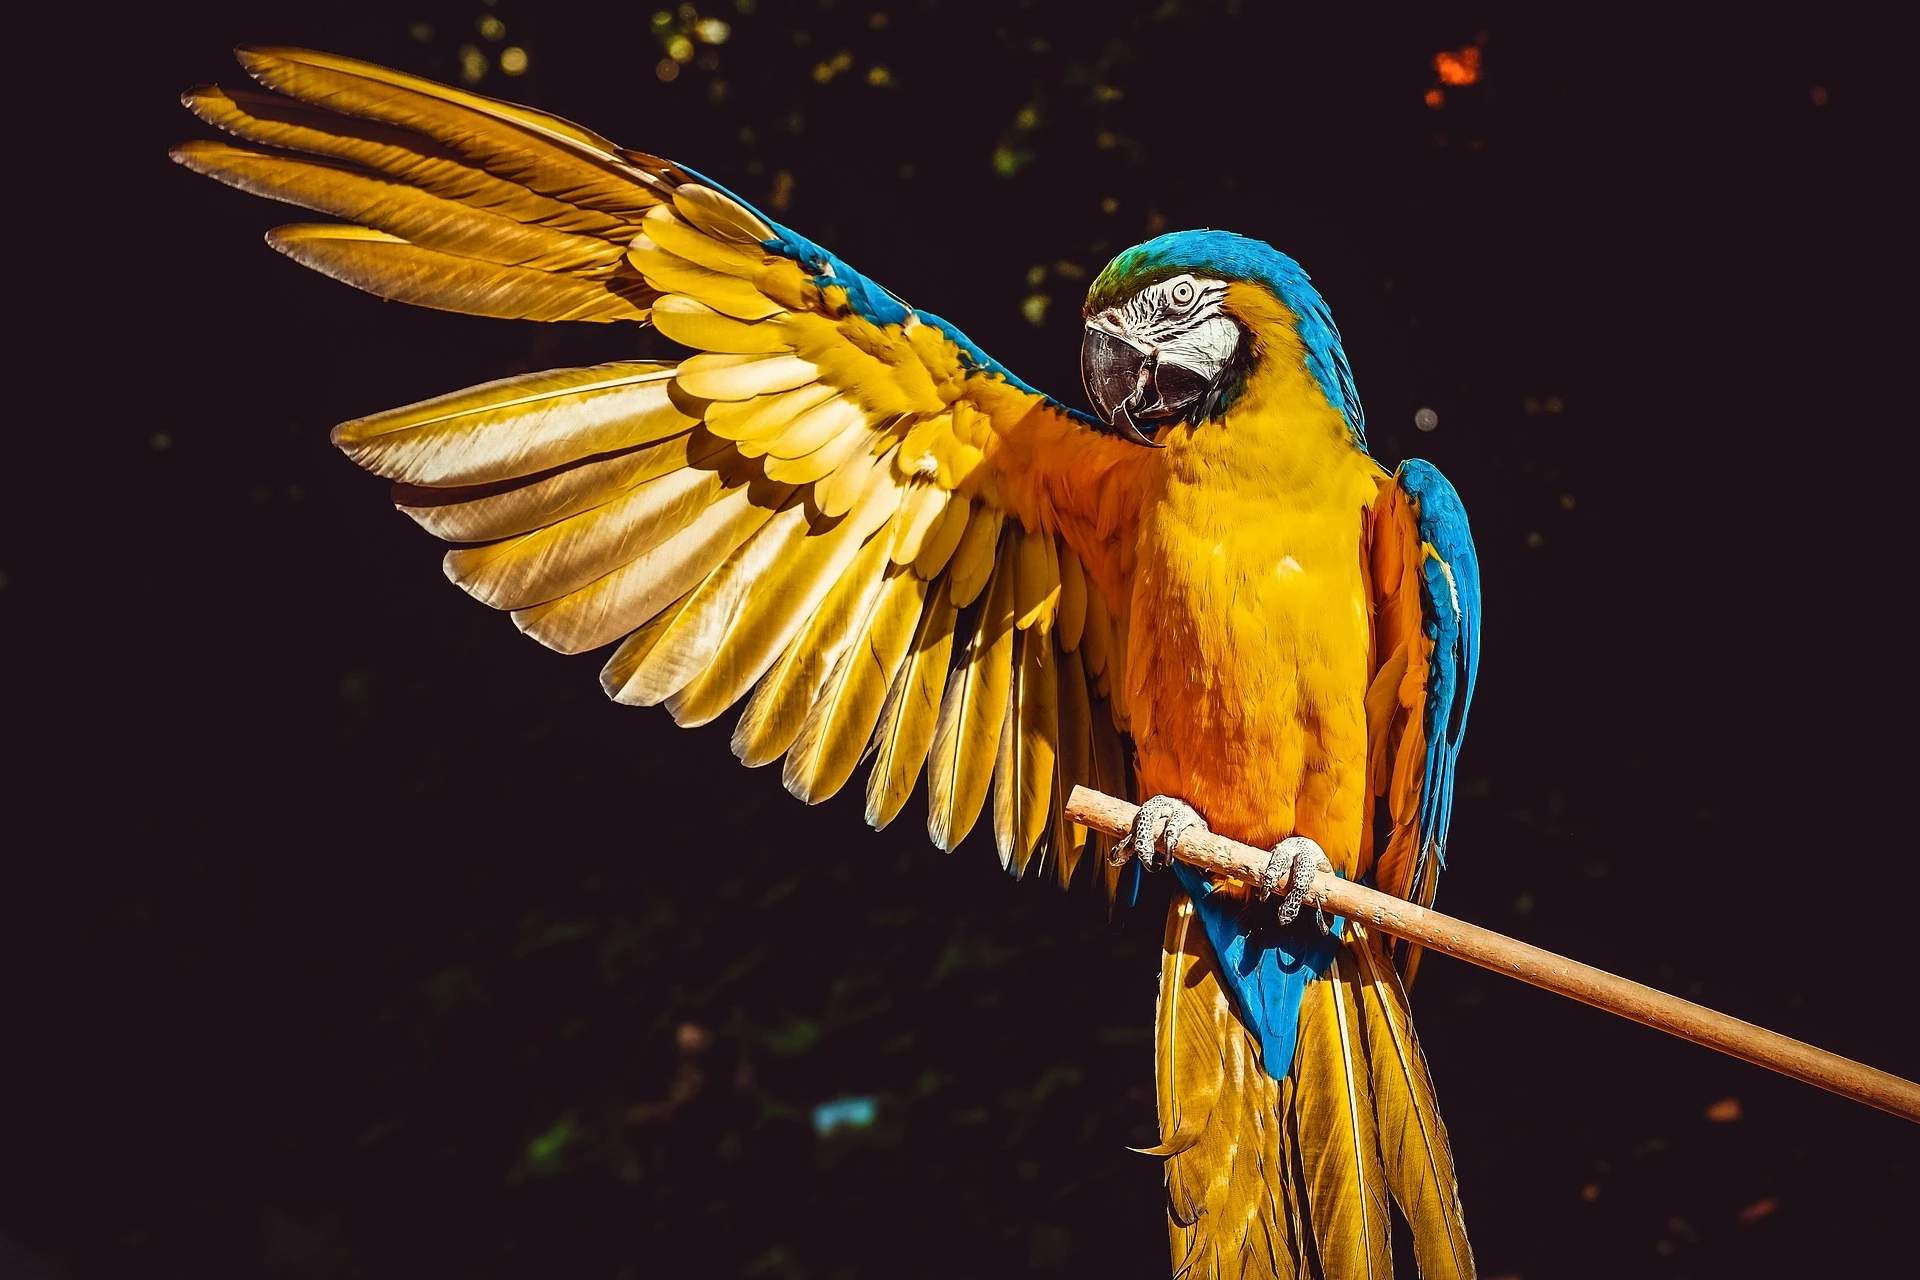

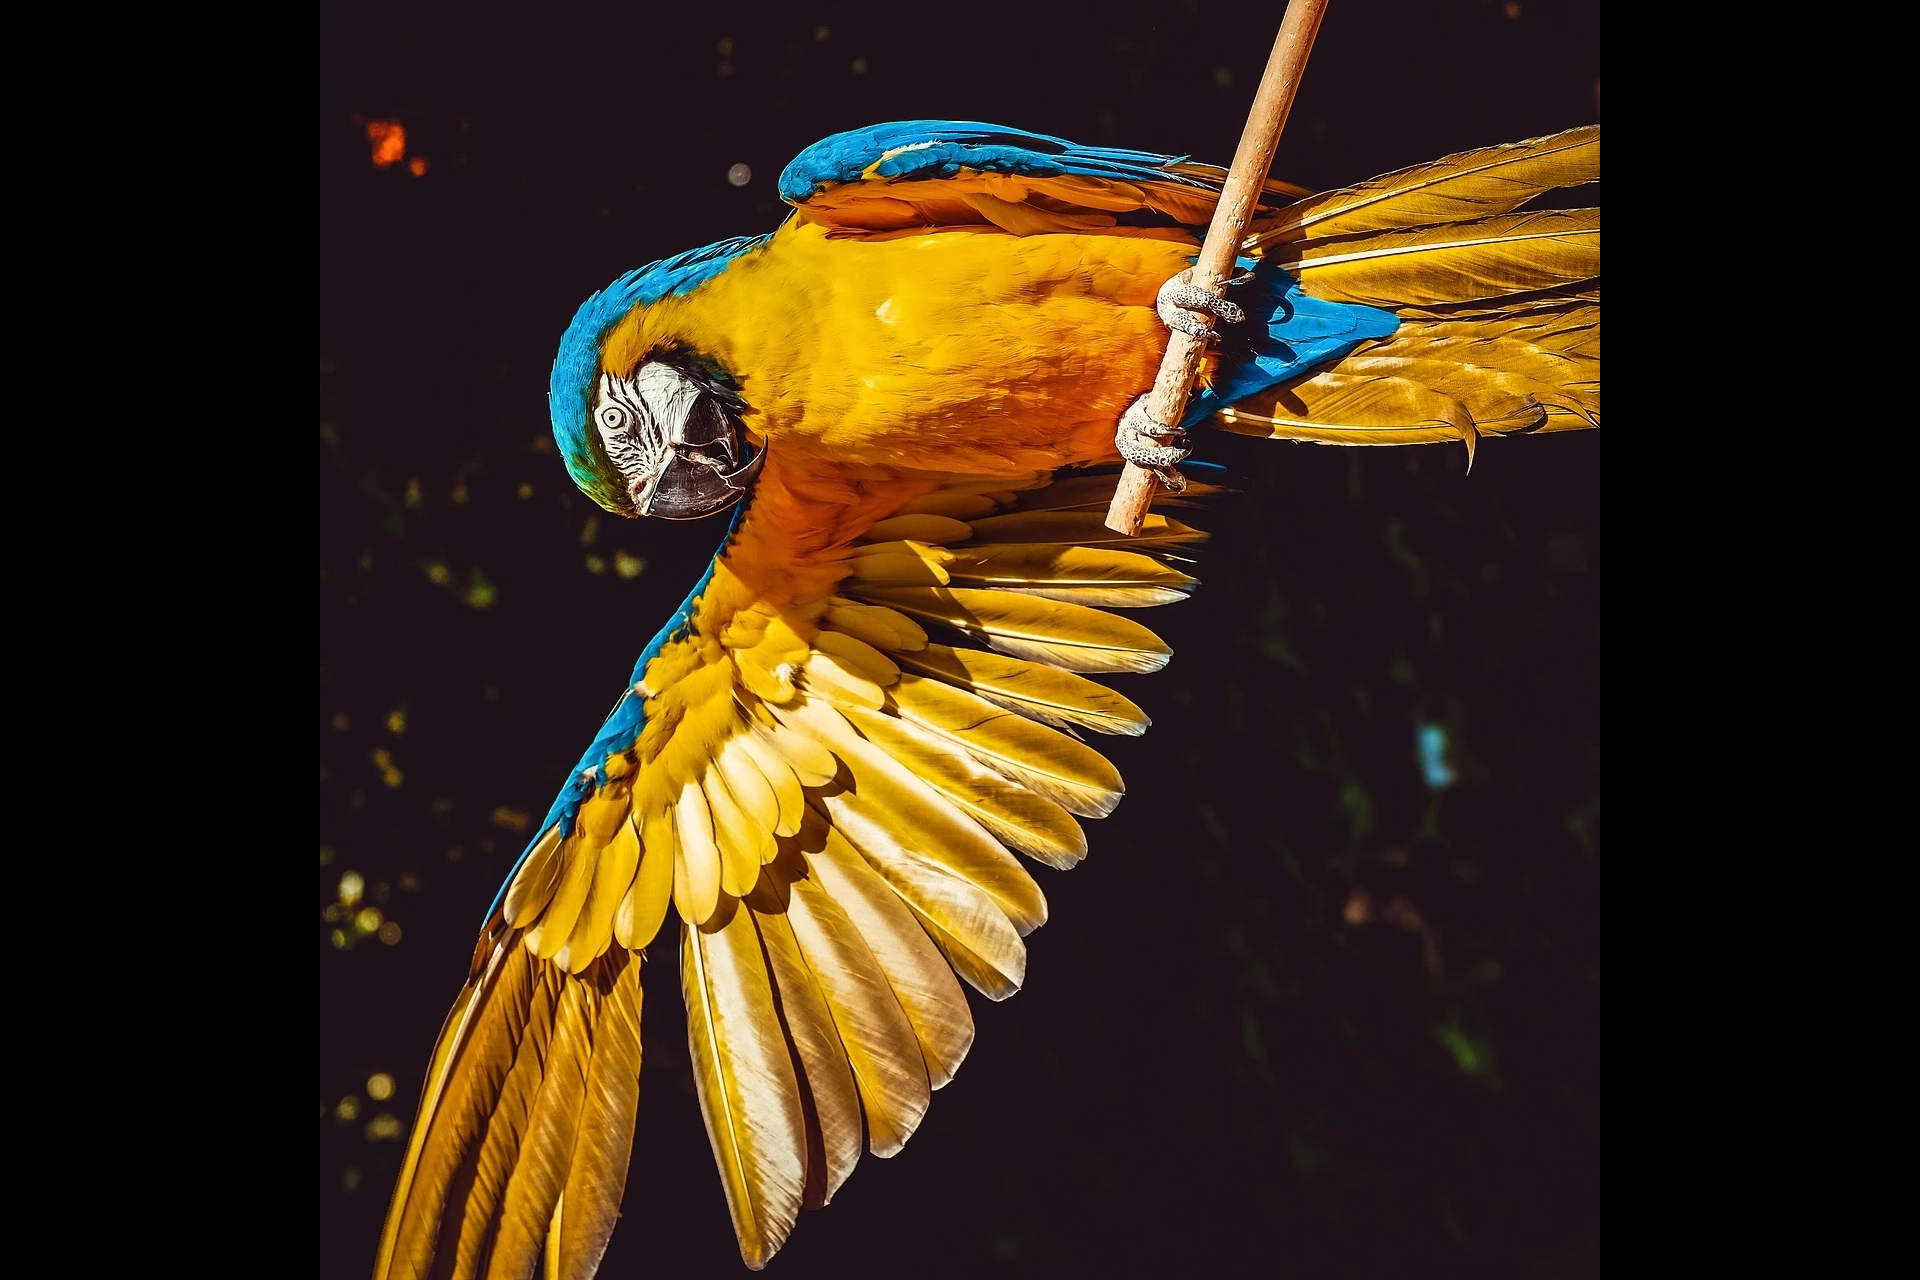

In [1]:
import cv2
import numpy as np
import requests
from google.colab.patches import cv2_imshow

url = 'https://raw.githubusercontent.com/dscoool/opencv/refs/heads/main/bird.webp'

# Download the image from the URL
response = requests.get(url,
                    stream=True).raw
image = np.asarray(bytearray(response.read()), dtype="uint8")

# Decode the image using OpenCV
src = cv2.imdecode(image, cv2.IMREAD_COLOR)

height, width, channel = src.shape
# 이미지 회전
matrix = cv2.getRotationMatrix2D((width/2,
        height/2), 90, 1)
dst = cv2.warpAffine(src, matrix,
        (width, height))

cv2_imshow(src)
cv2_imshow(dst)
cv2.waitKey()
cv2.destroyAllWindows()

In [ ]:
src = cv2.imdecode(image, cv2.IMREAD_COLOR)


In [ ]:
height, width, channel = src.shape


height, width, channel = src.shape를 이용하여 해당 이미지의 높이, 너비, 채널의 값을 저장합니다.



높이와 너비를 이용하여 회전 중심점을 설정합니다.



In [ ]:
matrix = cv2.getRotationMatrix2D((width/2, height/2), 90, 1)


2×3 회전 행렬 생성 함수(cv2.getRotationMatrix2D)로 회전 변환 행렬을 계산합니다.

matrix = cv2.getRotationMatrix2D(center, angle, scale)는 중심점(center), 각도(angle), 비율(scale)로 매핑 변환 행렬(matrix)을 생성합니다.

중심점(center)은 튜플(Tuple) 형태로 사용하며 회전의 기준점을 설정합니다.

각도(angle)는 중심점을 기준으로 회전할 각도를 설정합니다.

비율(scale)은 이미지의 확대 및 축소 비율을 설정합니다.



In [ ]:
dst = cv2.warpAffine(src, matrix, (width, height))


아핀 변환 함수(cv2.warpAffine)로 회전 변환을 계산합니다.

dst = cv2.warpAffine(src, M, dsize)는 원본 이미지(src)에 M(아핀 맵 행렬)을 적용하고 출력 이미지 크기(dsize)로 변형해서 출력 이미지(dst)를 반환합니다.

아핀 맵 행렬(M)은 회전 행렬 생성 함수에서 반환된 매핑 변환 행렬을 사용합니다.

출력 이미지 크기(dsize)는 튜플(Tuple) 형태로 사용하며 출력 이미지의 너비와 높이를 의미합니다.

아핀 맵 행렬에 따라 회전된 이미지를 반환합니다.

